# Uber Pickups in NYC -- Jan-Feb 2015


#### Selena Flannery -- Nov 13, 2016

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

%matplotlib inline
filename = "Uber-Jan-Feb-FOIL.csv"

data = np.genfromtxt(filename, names=True, dtype=("U10", object, float, float), unpack=True, delimiter=',', converters={"date":dateutil.parser.parse})
names = data.dtype.names
days = np.unique(data["date"])
bases = np.unique(data["dispatching_base_number"])
print(names)


('dispatching_base_number', 'date', 'active_vehicles', 'trips')


## Average Number of Total Active Vehicles

In [18]:
print(np.mean(data["active_vehicles"]))

1307.43502825


## Average Number of Trips Per Day

In [19]:
av_trip_per_day = np.mean([np.sum(data[data["date"] == day]["trips"]) for day in days])
print(av_trip_per_day)


70003.8983051


## Average Number of Active Vehicles Per Dispatching Base Per Day

In [20]:
av_vpb = [np.sum(data[data["dispatching_base_number"] == b]["active_vehicles"])/len(days) for b in bases]
av_vpb_per_day = np.mean(av_vpb)
print(av_vpb_per_day)

1307.43502825


## Average number of trips per vehicle per day

In [21]:
tpv = [np.sum(data[data["date"] == day]["trips"])/np.sum(data[data["date"] == day]["active_vehicles"]) for day in days]
av_tpv_per_day = np.mean(tpv)
print(av_tpv_per_day)


8.84514261976


## Standard deviation in active vehicles per day

In [22]:
std_veh_per_day = np.std([np.sum(data[data["date"] == day]["active_vehicles"]) for day in days])
print(std_veh_per_day)


1047.0193694


## For the month of January, which Dispatching Bases have active vehicles outside of one standard deviation from the mean?

In [23]:
base_totals = [(b, np.sum(data[data["dispatching_base_number"] == b]["active_vehicles"])) for b in bases]
base_names, vehicles_per_base = zip(*base_totals)
std = np.std(vehicles_per_base)
mean = np.mean(vehicles_per_base)

bases_with_more_than_one_std = [base_names[i] for i, x in enumerate(vehicles_per_base) if abs(x - mean) > std]
print(bases_with_more_than_one_std)


['B02764']


## Which month showed more activity for Uber, January 2015 or February 2015? 


In [24]:
jan_trips = {d: 0 for d in days if d.month == 1}
feb_trips = {d: 0 for d in days if d.month == 2}

for row in data:
    if row["date"].month == 1:
        jan_trips[row[1]] += float(row[3])
    if row["date"].month == 2:
        feb_trips[row[1]] += float(row[3])

jan_total = sum(jan_trips.values())
jan_av = jan_total/len(jan_trips)
feb_total = sum(feb_trips.values())
feb_av = feb_total/len(feb_trips)

print("""
In January, there was a total of {} trips\nand an average of {} trips per day.
In February there was a total of {} trips\nand an average of {} trips per day.
""".format(jan_total, jan_av, feb_total, feb_av))
print("From this data, it is clear that February showed more total trips and average trips per day")
# jan_trips = np.sum(data[data["date"].month == "January"]["trips"])


In January, there was a total of 1908649.0 trips
and an average of 61569.32258064516 trips per day.
In February there was a total of 2221581.0 trips
and an average of 79342.17857142857 trips per day.

From this data, it is clear that February showed more total trips and average trips per day


## Visualizations

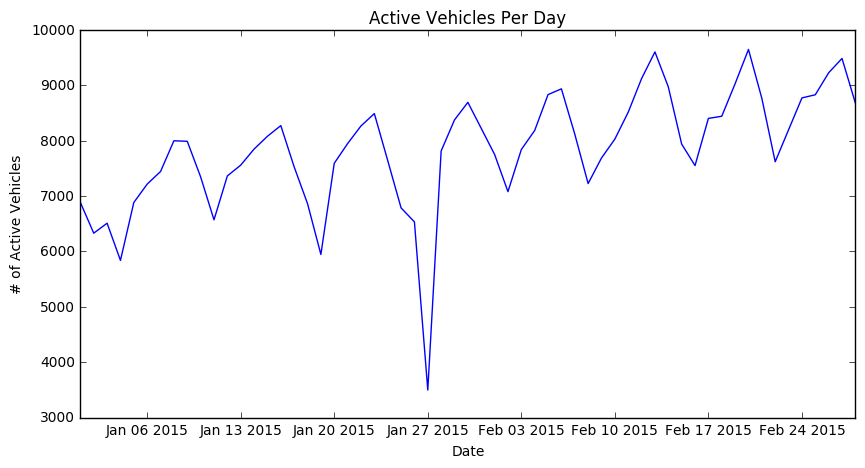

In [25]:
x, y = zip(*[(d, np.sum(data[data["date"] == d]["active_vehicles"])) for d in days])
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title("Active Vehicles Per Day")
plt.xlabel("Date")
plt.ylabel("# of Active Vehicles")

plt.show()

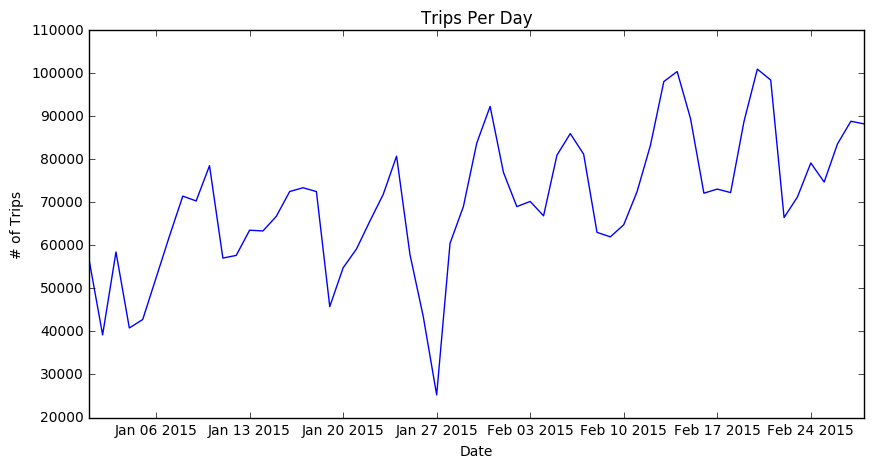

In [26]:
x, y = zip(*[(d, np.sum(data[data["date"] == d]["trips"])) for d in days])
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title("Trips Per Day")
plt.xlabel("Date")
plt.ylabel("# of Trips")

plt.show()

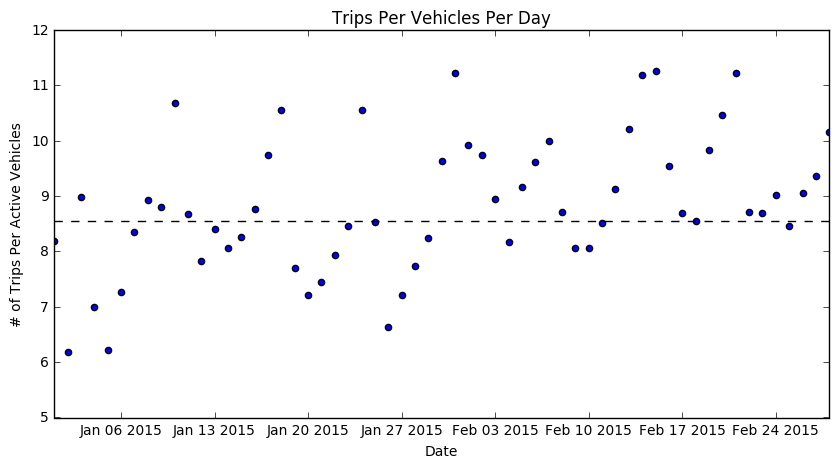

In [22]:
x, y = zip(*[(d, np.sum(data[data["date"] == d]["trips"])/np.sum(data[data["date"] == d]["active_vehicles"])) for d in days])
two_month_average = np.mean(data["trips"]/data["active_vehicles"])

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot([x[0], x[-1]], [two_month_average, two_month_average], color="black", linestyle="--")
plt.xlim(x[0], x[-1])
plt.title("Trips Per Vehicles Per Day")
plt.xlabel("Date")
plt.ylabel("# of Trips Per Active Vehicles")

plt.show()